In [0]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
#matplotlib.use("Agg")
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import imageio

%matplotlib inline

In [439]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cats = os.listdir('/content/drive/My Drive/animals_data/cats/')
dogs = os.listdir('/content/drive/My Drive/animals_data/dogs/')
pandas = os.listdir('/content/drive/My Drive/animals_data/panda/')
filepath = '/content/drive/My Drive/animals_data/cats/'
filepath2 = '/content/drive/My Drive/animals_data/dogs/'
filepath3 = '/content/drive/My Drive/animals_data/panda/'

In [441]:
filepath

'/content/drive/My Drive/animals_data/cats/'

In [0]:
cats

In [0]:
pandas

In [0]:
images = []
labels = []

for i in cats:
  image = cv2.imread(filepath+i)
  image = cv2.resize(image, (32, 32))
  images.append(image)
  labels.append('cats')
  print(i)

for i in dogs:
  image = cv2.imread(filepath2+i)
  image = cv2.resize(image, (32, 32))
  images.append(image)
  labels.append('dogs')

for i in pandas:
  if i[-3] == 'j':
    image=cv2.imread(filepath3+i)
    image = cv2.resize(image, (32, 32))
    images.append(image)
    labels.append('pandas')
    print(i)


In [0]:
images[2999]

In [446]:
labels[-1]

'pandas'

In [447]:
labels[2999]

'pandas'

In [0]:
images[-1]

In [449]:
type(images)

list

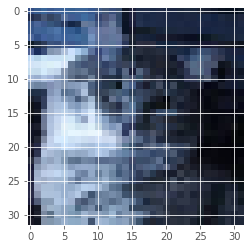

In [450]:
plt.imshow(images[0])

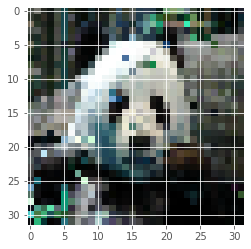

In [451]:
plt.imshow(images[2999])

In [0]:
images = np.array(images, dtype="float") / 255.0
labels = np.array(labels)


In [0]:
images[0]

In [454]:
labels

array(['cats', 'cats', 'cats', ..., 'pandas', 'pandas', 'pandas'],
      dtype='<U6')

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.25, random_state=42)

In [456]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(2250, 32, 32, 3)
<class 'numpy.ndarray'>
(2250,)
<class 'numpy.ndarray'>
(750, 32, 32, 3)
<class 'numpy.ndarray'>
(750,)


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [458]:
lb.classes_

array(['cats', 'dogs', 'pandas'], dtype='<U6')

In [459]:
trainY.shape

(2250, 3)

In [460]:
trainY

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(3, activation = "softmax"))

In [0]:
INIT_LR = 0.01
EPOCHS = 25

opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [463]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)

Train on 2250 samples, validate on 750 samples
Epoch 1/25
2250/2250 [==============================] - 21s 9ms/step - loss: 1.0931 - accuracy: 0.3711 - val_loss: 1.0752 - val_accuracy: 0.5040
Epoch 2/25
2250/2250 [==============================] - 21s 9ms/step - loss: 1.0497 - accuracy: 0.4609 - val_loss: 0.9917 - val_accuracy: 0.5040
Epoch 3/25
2250/2250 [==============================] - 21s 9ms/step - loss: 0.9917 - accuracy: 0.4916 - val_loss: 0.9379 - val_accuracy: 0.5280
Epoch 4/25
2250/2250 [==============================] - 21s 9ms/step - loss: 0.9456 - accuracy: 0.5249 - val_loss: 0.9046 - val_accuracy: 0.5480
Epoch 5/25
2250/2250 [==============================] - 21s 9ms/step - loss: 0.9018 - accuracy: 0.5502 - val_loss: 0.8495 - val_accuracy: 0.5600
Epoch 6/25
2250/2250 [==============================] - 21s 9ms/step - loss: 0.8742 - accuracy: 0.5573 - val_loss: 0.8903 - val_accuracy: 0.5360
Epoch 7/25
2250/2250 [==============================] - 21s 9ms/step - loss: 0.8583

In [464]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=['cats','dogs','pandas']))


              precision    recall  f1-score   support

        cats       0.63      0.45      0.53       262
        dogs       0.52      0.51      0.51       249
      pandas       0.71      0.94      0.81       239

    accuracy                           0.63       750
   macro avg       0.62      0.63      0.62       750
weighted avg       0.62      0.63      0.61       750



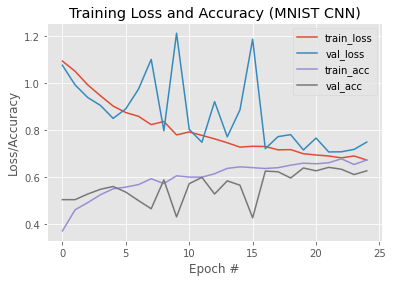

In [465]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [0]:
model.save('cnn_animalsclassif.model')

In [0]:
#loading testing images

test_imgs = os.listdir('/content/drive/My Drive/animals_data/images')
filepath_testimgs = '/content/drive/My Drive/animals_data/images/'

In [468]:
test_imgs

['panda.jpg', 'dog.jpg', 'cat.jpg']

In [0]:
panda_test = cv2.imread('/content/drive/My Drive/animals_data/images/panda.jpg')

In [0]:
panda_test = cv2.resize(panda_test , (32,32))

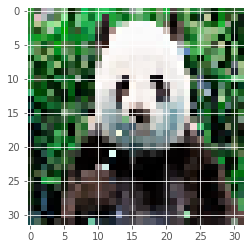

In [471]:
plt.imshow(panda_test)

In [0]:
output = panda_test.copy()

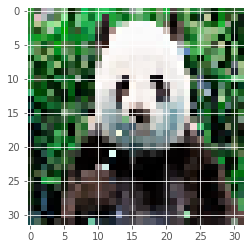

In [473]:
plt.imshow(output)

In [0]:
panda_test = np.array(panda_test, dtype="float") / 255.0

In [0]:
panda_test = panda_test.reshape((1,32,32,3))

In [0]:
pred = model.predict(panda_test)

In [477]:
pred

array([[1.8930090e-04, 1.6806747e-03, 9.9813002e-01]], dtype=float32)

In [478]:
i = pred.argmax(axis=1)[0]
i

2

In [479]:
val = pred.max()
val

0.99813

In [480]:
perc_val = val*100
perc_val = perc_val.round(2)
perc_val

99.81

In [0]:
from google.colab.patches import cv2_imshow

In [482]:
label = lb.classes_[i]
label

'pandas'

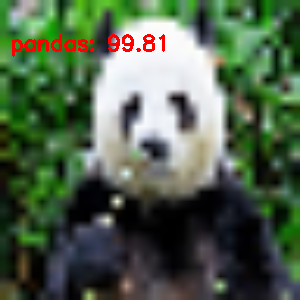

In [486]:
text = label+": "+str(perc_val)

cv2.putText(output, text , (10,50),  cv2.FONT_HERSHEY_SIMPLEX, 0.7 ,(0, 0, 255), 2)

output = cv2.resize(output , (300,300))

# show the output image

cv2_imshow(output)